## 선형회귀(Linear Regression) - 직선을 학습하는 algorithm

- 선형회귀(linear regression)는 널리 사용되는 대표적인 회귀 알고리즘이다.
- 직선을 학습하는 알고리즘으로 데이터를 올바른 선으로 잘 나타내야 한다.

### 1. 선형회귀 알고리즘 구현
- 사이킷런은 LinearRegression클래스로 선형회귀 알고리즘을 구현한다.
- 사이킷런 클래스들은 훈련, 평가, 예측하는 메소드 이름이 모두 동일하다. **fit(), score(), predict()**

In [2]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)
(42, 1) (14, 1)


### LinearRegression 객체 (모델) 생성

모델을 생성하고, 훈련 및 모델에 대한 예측을 진행항다.

In [4]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#선형 회귀 모델 훈련
linreg.fit(train_input, train_target)

#50cm 농어에 대한 예측
print(linreg.predict([[50]]))

#1000cm 농어에 대한 예측
print(linreg.predict([[1000]]))

[1241.83860323]
[38308.12631868]


==> linear regression을 통해 주어진 과거 데이터 범위에 없는 무게값(타겟값)이 확인된다.

#### 과서 데이터 범위 밖의 타겟까지 예측할 수 있도록 해준 linear regression expression은 무엇인가?

     y = a*(x) + b
     
x는 농어 길이, y는 농어의 무게, a는 coefficient, b는 intercept속성이다.

데이터에 알맞는 a,b를 찾아서 길이가 주어졌을때, 무게를 예측할 수 있다. 

In [6]:
print(linreg.coef_, linreg.intercept_)

[39.01714496] -709.0186449535477


In [7]:
import matplotlib.pyplot as plt

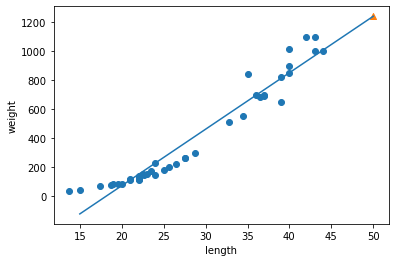

In [8]:
plt.scatter(train_input, train_target)

plt.plot([15,50],[15*linreg.coef_+linreg.intercept_, 50*linreg.coef_+linreg.intercept_])

plt.scatter(50, 1241.8, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 회귀는 평가점수를 R2 값으로 확인한다.

- 길이가 50센티인 농어에 대한 예측이 이 직선의 연장선에 있다.
- 이제 훈련세트 범위를 벗어난 농어의 무게도 예측할 수 있다.
- 훈련세트와 테스트 세트에 대한 R2 점수를 확인한다.

In [9]:
print(linreg.score(train_input, train_target))
print(linreg.score(test_input, test_target))

0.939846333997604
0.8247503123313558


#### 과소적합 or 과대적합?
대부분 테스트 세트의 정확도는 훈련 세트의 점수보다 낮다.

위에 점수는 테스트 세트의 점수가 훈련세트 점수에 비해 많이 나쁘지 않기 때문에 (훈련세트가 0.99에 가까운 경우라면, 상대적으로 훈련 세트의 점수가 너무 높기땜누에 과대적합으로 판단할 수 있다) 훈련세트 정확도가 지금같이 0.94수준인 이 경우에는 훈련세트의 과대적합보다는 두 점수가 둘다 낮은 과소적합으로 볼 수 있다.

#### 선형 모델이 적합한가?
훈련데이터의 산점도를 보면 직선보다는 곡선에 가깝다.

그리고 위의 그래프의 직선이 왼쪽 아래로 쭉 뻗어있어서 이 직선대로 예측하면 농어의 무게가 0그램 이하로 내려갈 수도 있다.
 
직선보다는 최적의 곡선을 찾아야 한다.

### 2. 다항회귀(polynomial regression)
- 곡선의 그래프를 만들려면 2차방정식을 만들어야 한다. 이차방정식을 만들려면 제곱한 항이 훈련세트에 추가되어야 한다.
- 농어의 길이를 제곱해서 원래 데이터 옆에 붙인다.
- column_stack() 함수를 사용하여, train_input 제곱한거, train_input 두배열을
  나란히 붙혀서 새로운 데이터 배열을 생성한다.

In [11]:
#broadcasting 적용
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)
#train_poly
#훈련세트와 테스트 세트 모두 열이 2개로 늘어난것을 확인.

(42, 2) (14, 2)


In [12]:
#'길이의 제곱'이라는 특성이 추가된 데이터로 선형회귀 모델을 훈련시킨다. 
lingreg = LinearRegression()
linreg.fit(train_poly, train_target)

#다시 길이=50인 샘플 생선의 무게(타겟값)을 예측해본다.
print(linreg.predict([[50**2, 50]]))

[1573.98423528]


In [13]:
#예측을 위해 사용된 모델의 공식을 확인
print(linreg.coef_, linreg.intercept_)
# [a,b] c <-- a*x^2 + b*x + c에서 constants a,b는 coef_로 출력된다. 

[  1.01433211 -21.55792498] 116.05021078278259


이차방정식은 비선형이라 선형회귀로 부를 수 없다 그래서, 길이 제곱부분을 이름을 바꾸어서 다항의 형태로 만들면 된다. 다항식을 사용한 선형 회귀를 다항 회귀(polynomial regression)이라 한다.

짧은 직선을 이어서 그리면 마치 곡선처럼 표현할 수 있다. 아래와 같이 1씩 짧게 끊어서 그린다.

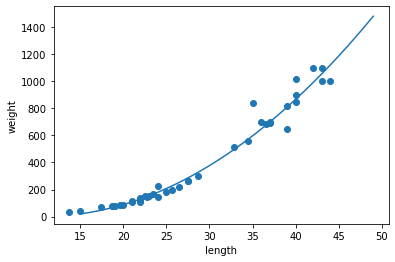

In [14]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 2차방정식의 계수와 절편 a,b,c로 동일하게 훈련세트의 산점도 그래프를 그려본다
# 15에서 49까지 2차 방정식 그래프를 그린다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
#plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

==> 앞의 단순 선형 회귀 모델보다 휠씬 나은 그래프가 그려졌다. 훈련세트의 경향을 잘 나타내고 있다. 무게가 음수로 나올일도 없다.

### 아직도 과소적합인지?

In [15]:
print(linreg.score(train_poly, train_target))
print(linreg.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


훈련세트와 테스트 세트에 대한 점수가 크게 높아졌다.

하지만 여전히 테스트 세트의 점수가 조금 더 높기때문에 과소적합이 아직 남아있다. 

그래서 아직 개선의 여지가 남아있다. 좀더 복잡한 모델이 필요하다.